# Title : Analyzing Air Quality Index (AQI) Trends in a City

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv("/Users/dhruvpai/Downloads/practicals/DMV/data.csv", encoding="cp1252") 
df

/var/folders/9j/bw9yqrxj5h369mrl2hzrdgbm0000gn/T/ipykernel_56942/56504492.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/dhruvpai/Downloads/practicals/DMV/data.csv", encoding="cp1252")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [7]:
df.shape

(435742, 13)

In [8]:
df.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [9]:
# Cleaning up name changes
df.state = df.state.replace({'Uttaranchal':'Uttarakhand'}) 
df.state[df.location == "Jamshedpur"] = df.state[df.location == 'Jamshedpur'].replace({"Bihar":"Jharkhand"})

/var/folders/9j/bw9yqrxj5h369mrl2hzrdgbm0000gn/T/ipykernel_56942/3844857264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.state[df.location == "Jamshedpur"] = df.state[df.location == 'Jamshedpur'].replace({"Bihar":"Jharkhand"})


In [10]:
# Changing types to uniform format
types = {
    "Residential": "R", 
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO", 
    "Industrial Area": "I",
    "Industrial Areas": "I", 
    "Industrial": "I", 
    "Sensitive Area": "S", 
    "Sensitive Areas": "S", 
    "Sensitive": "S", 
    np.nan: "RRO"
}

df.type = df.type.replace(types) 
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [11]:
# defining columns of importance, which shall be used reguarly 
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [12]:
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
df[VALUE_COLS] = imputer.fit_transform(df[VALUE_COLS])

In [13]:
# checking to see if the dataset has any null values left over and the format 
print(df.isnull().sum())
df.tail()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                                0
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN
435741,NaN,NaN,Tripura,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN


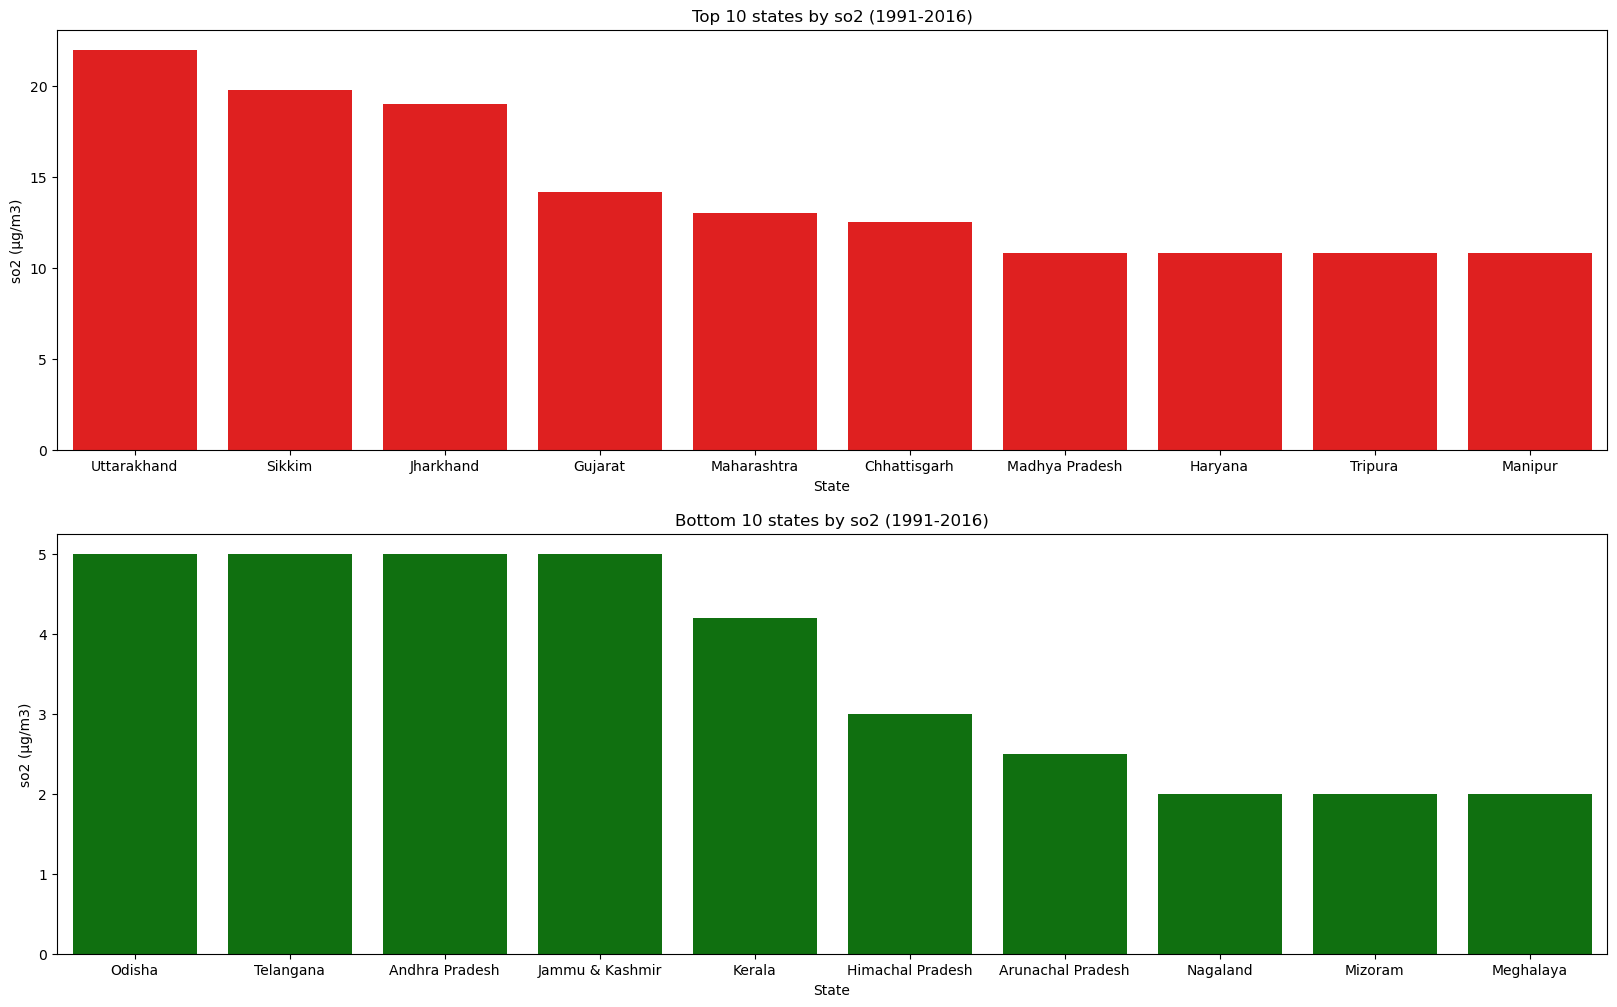

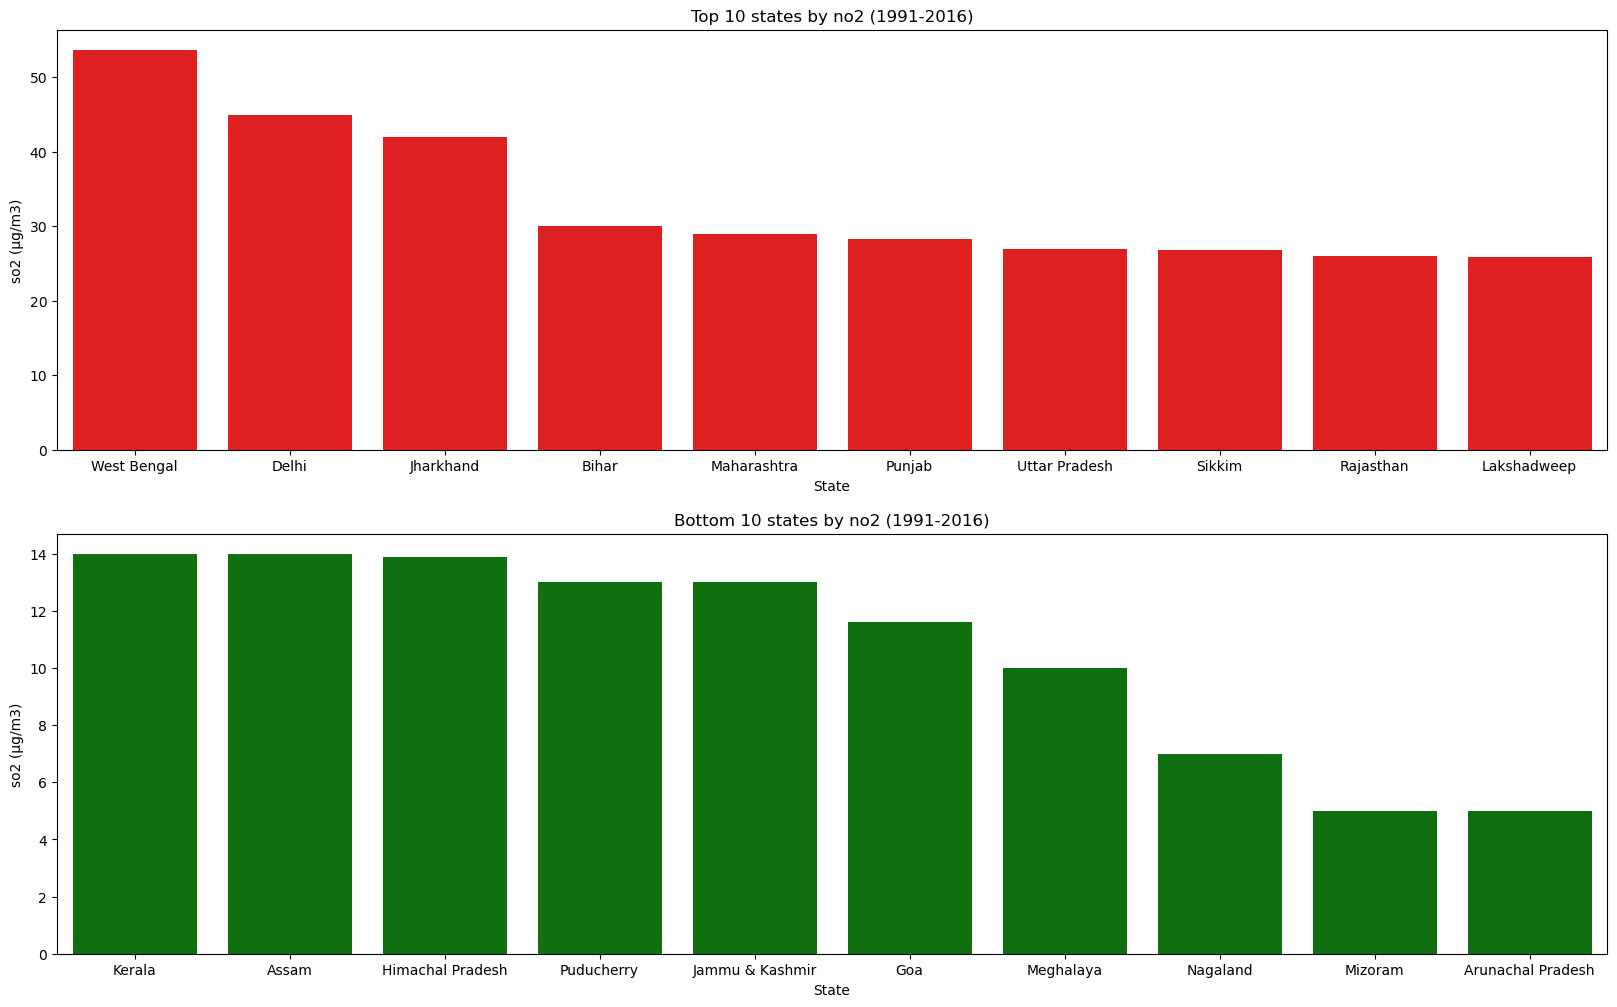

In [14]:
# Plotting highest and lowest ranking states
# defining a function to find and plot the top 10 and bottom 10 states for a given indicator (defaults to SO2) 
def top_and_bottom_10_states(indicator="so2"):
    fig, ax = plt.subplots(2,1, figsize=(20, 12))
    ind = df[[indicator, 'state']].groupby('state', as_index=False).median().sort_values(by=indicator,ascending=False)
    top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0], color='red') 
    top10.set_title("Top 10 states by {} (1991-2016)".format(indicator)) 
    top10.set_ylabel("so2 (µg/m3)")
    top10.set_xlabel("State")
    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1], color='green') 
    bottom10.set_title("Bottom 10 states by {} (1991-2016)".format(indicator)) 
    bottom10.set_ylabel("so2 (µg/m3)")
    bottom10.set_xlabel("State") 

top_and_bottom_10_states("so2") 
top_and_bottom_10_states("no2")

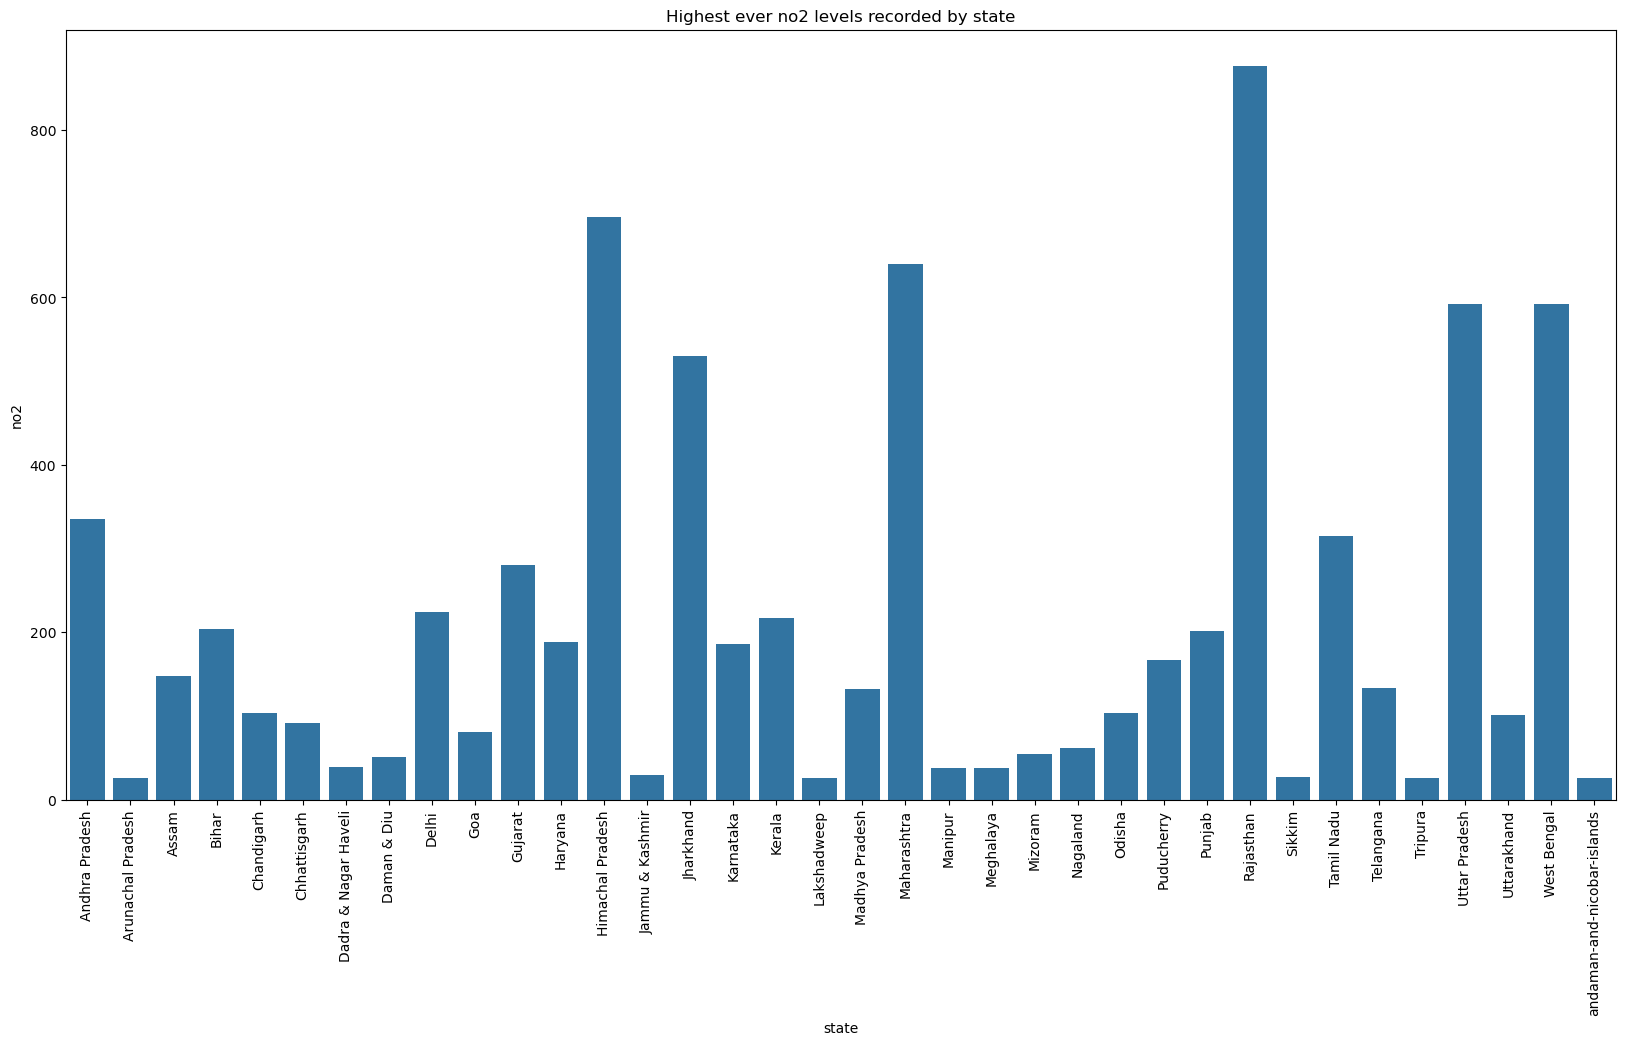

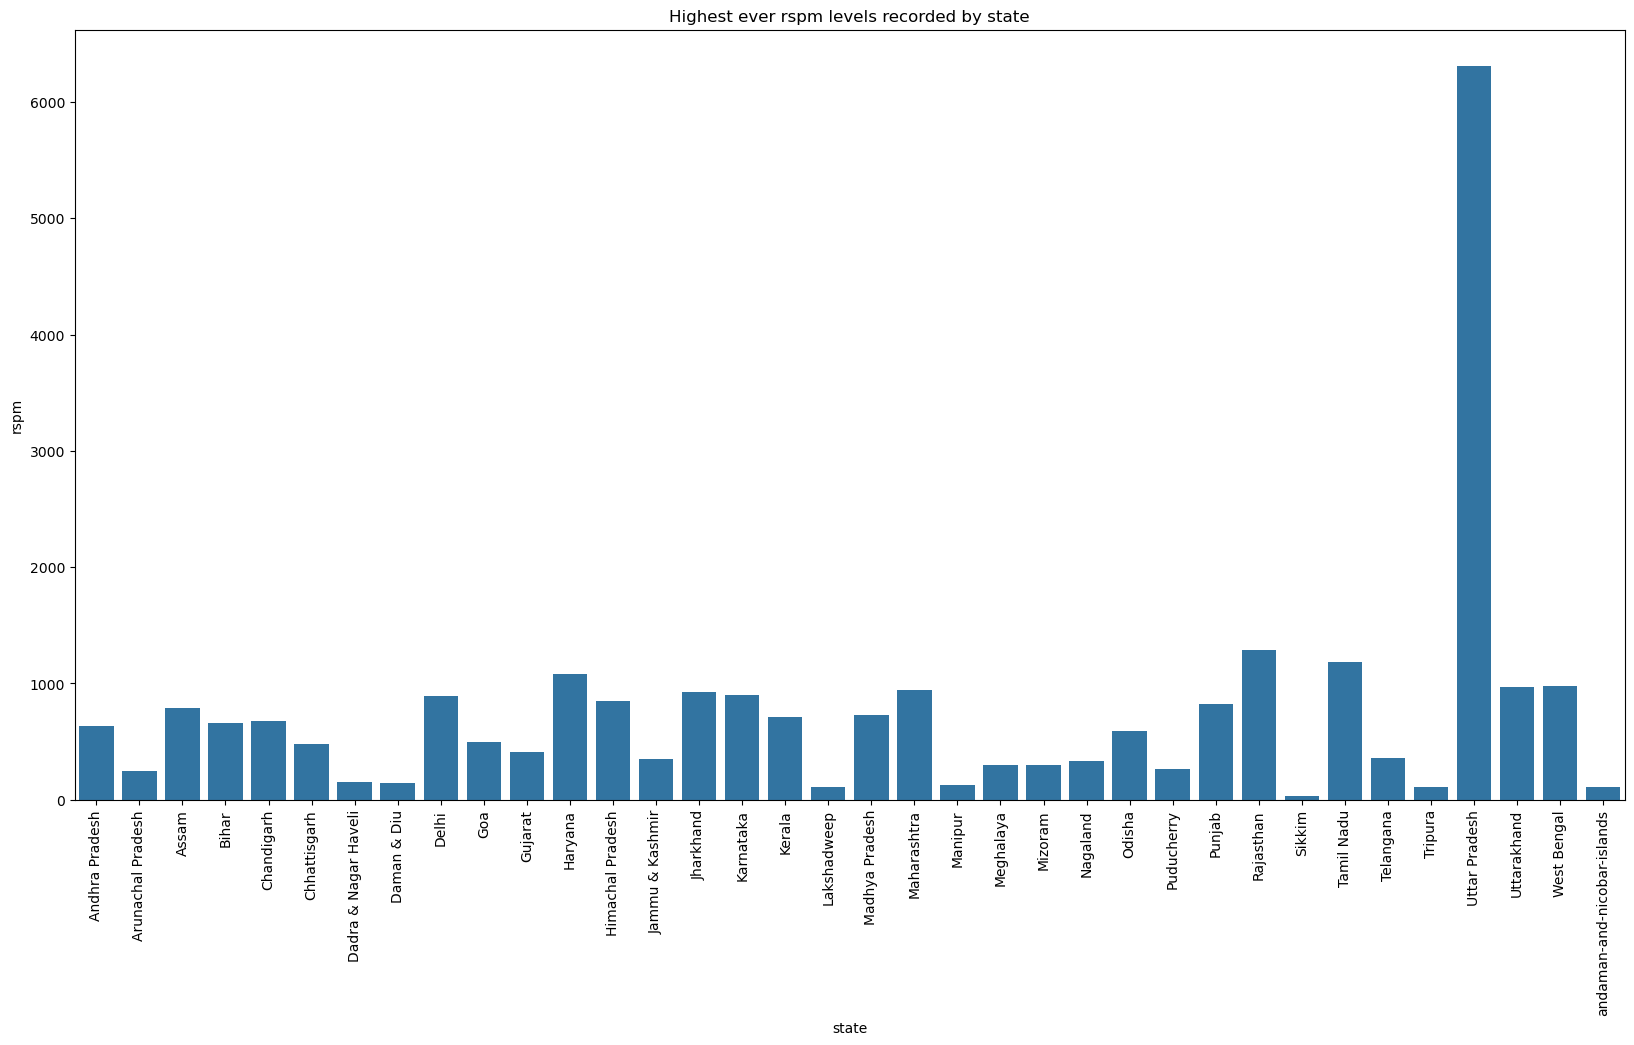

In [21]:
# Plotting the highest ever recorded levels
# defining a function to find the highest ever recorded levels for a given indicator (defaults to SO2) by state 
# sidenote: mostly outliers
def highest_levels_recorded(indicator="so2"): 
    plt.figure(figsize=(20,10))
    ind = df[[indicator, 'location', 'state', 'date']].groupby('state', as_index=False).max(numeric_only=True)
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title("Highest ever {} levels recorded by state".format(indicator))
    plt.xticks(rotation=90) 
    
highest_levels_recorded("no2") 
highest_levels_recorded("rspm")

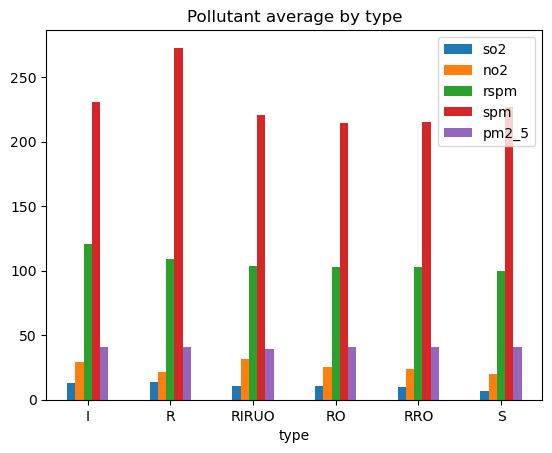

In [20]:
# Plotting pollutant average by type
# defining a function to plot pollutant averages by type for a given indicator 
def type_avg(indicator=""):
    type_avg = df[VALUE_COLS + ['type', 'date']].groupby("type").mean(numeric_only=True)
    if not indicator:
        t = type_avg[indicator].plot(kind='bar') 
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type for {}".format(indicator)) 
    else:
        t = type_avg.plot(kind='bar') 
        plt.xticks(rotation = 0) 
        plt.title("Pollutant average by type")

type_avg('so2')

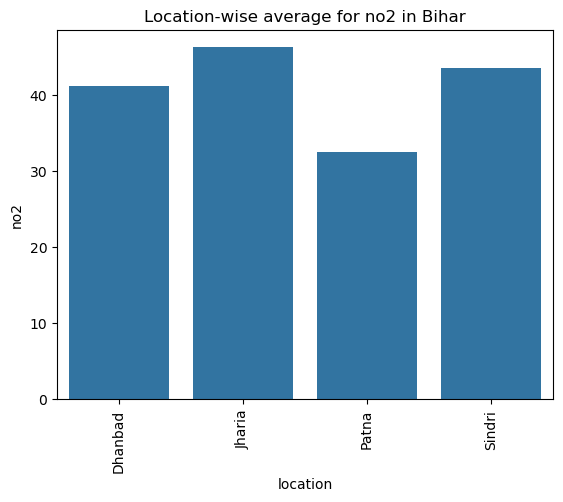

In [18]:
# Plotting pollutant averages by locations/state
# defining a function to plot pollutant averages for a given indicator (defaults to SO2) by locations in a given state 
def location_avgs(state, indicator="so2"):
    locs = df[VALUE_COLS + ['state', 'location', 'date']].groupby(['state', 'location']).mean(numeric_only=True)
    state_avgs = locs.loc[state].reset_index()
    sns.barplot(x='location', y=indicator, data=state_avgs) 
    plt.title("Location-wise average for {} in {}".format(indicator, state)) 
    plt.xticks(rotation = 90)

location_avgs("Bihar", "no2")

Explanation:
Imports : 
numpy (np): Used for handling arrays and mathematical operations.
pandas (pd): Used for data manipulation and analysis, particularly for handling data in DataFrame format.
matplotlib.pyplot (plt): Used for creating visualizations (e.g., plots, charts).
seaborn (sns): A higher-level interface for creating visually appealing statistical graphics based on matplotlib.
SimpleImputer: From sklearn, used for handling missing data by filling missing values with the specified strategy (e.g., mean, median).
warnings: To suppress warnings, particularly the ones related to library updates.

Reading the Dataset:
Reads the CSV file data.csv into a DataFrame called data. The encoding "cp1252" ensures correct handling of special characters (used in European languages).

Checking Data Structure:
Displays basic information about the DataFrame, such as the number of non-null entries and the data types of each column.

Cleaning up Name Changes:
data.state.replace({'Uttaranchal':'Uttarakhand'}): Replaces instances of 'Uttaranchal' with 'Uttarakhand' in the state column.
data.state[data.location == "Jamshedpur"]: Updates the state value for rows where the location is Jamshedpur to replace Bihar with Jharkhand.

Changing Data Types:
A dictionary types is created to standardize the values in the type column, where various names (e.g., "Residential", "Industrial Areas") are mapped to a shorter version (e.g., "R", "I").
np.nan: "RRO" replaces any missing values (NaN) in the type column with "RRO".
data.type.replace(types): Applies the mapping to the type column.

Handling Missing Data (Imputation):
VALUE_COLS: Defines the columns of interest that contain pollutant concentration values (e.g., so2, no2).
SimpleImputer: Creates an imputer object to handle missing values by filling them with the mean of the respective columns.
fit_transform: This method applies the imputation to the columns specified in VALUE_COLS.

Checking for Missing Values:
data.isnull().sum(): Checks and prints the total number of missing values for each column in the dataset after imputation.
data.tail(): Displays the last few rows of the dataset.

Top and Bottom 10 States by Pollutant:
top_and_bottom_10_states: A function to plot the top and bottom 10 states for a given pollutant indicator (default is "so2").
groupby('state'): Groups the data by state.
median(): Finds the median value of the specified pollutant (indicator).
sns.barplot(): Creates a bar plot showing the top and bottom 10 states for that pollutant.

Plotting Highest Recorded Levels:
highest_levels_recorded: This function finds the highest ever recorded levels for a given pollutant by state.
groupby('state'): Groups the data by state.
max(): Finds the maximum value of the pollutant in each state.
sns.barplot(): Creates a bar plot to visualize the highest recorded levels for the given pollutant.

Plotting Pollutant Averages by Type:
type_avg: This function computes and visualizes the average pollutant concentration by type (e.g., "Residential", "Industrial").
groupby('type'): Groups the data by type.
mean(): Computes the average value of pollutants for each type.
plot(kind='bar'): Creates a bar plot to show the average pollutant concentrations by type.

Plotting Pollutant Averages by Location/State:
location_avgs: This function computes the average pollutant concentration by location within a given state.
groupby(['state', 'location']): Groups the data by state and location.
mean(): Computes the average pollutant value for each combination of state and location.
sns.barplot(): Creates a bar plot showing the location-wise average for a given pollutant in a specified state.

Summary:
Algorithms/Techniques Used:
Imputation (SimpleImputer): To fill missing values using mean imputation.
Data Grouping: Used groupby() and median()/max() to aggregate data at state or location levels.
Visualization: Seaborn's barplot() is used to create visualizations, showcasing state-level pollutant levels

